# House Price Championship for Kaggle Knowledge
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

## Load train and test dataset 

In [3]:
df_train = pd.read_csv("../DATA/train.csv")
df_test = pd.read_csv("../DATA/test.csv")


In [4]:
# Read description file, to know each feature
descripcion = open("../data_description.txt", "r") 
with open("../data_description.txt") as f:
    contents = f.read()
    print(contents)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [230]:
#Set Id as the index, we cant drop the index, because is one of the parameters for the output result in the submission
df_train = df_train.set_index('Id')
df_test = df_test.set_index('Id')
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
df_train.describe() #We explore each of the numerical features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df_train.info() # Explore the number of non-null data for each feature and the type of feature(Object or number)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
#Review the correlation between numerical features
df_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


### Plotting the correlation between numercial features

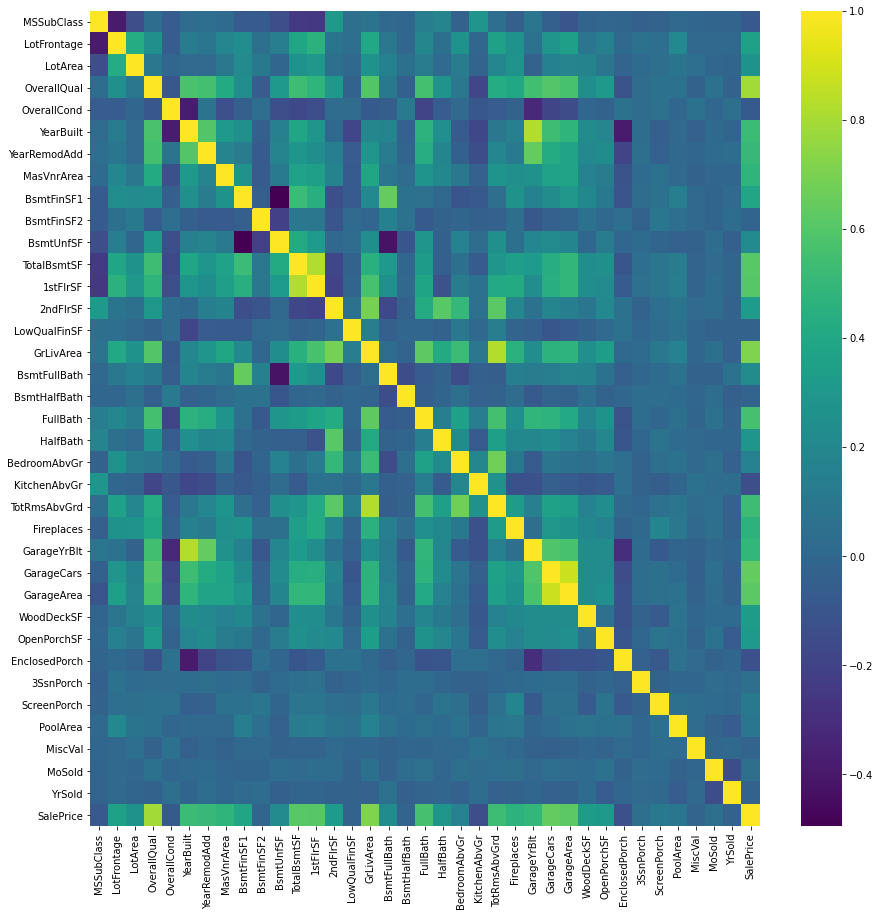

In [12]:
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(data=df_train.corr(), ax=ax, cmap="viridis")

In [231]:
#checking the features that have more than 5% of null values
df_train.isnull().sum()/len(df_train)*100 >5

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool

In [14]:
#Checking the correlation between numerical features with the saleprice
df_train.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

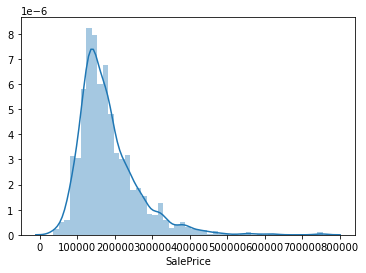

In [15]:
sns.distplot(df_train["SalePrice"])

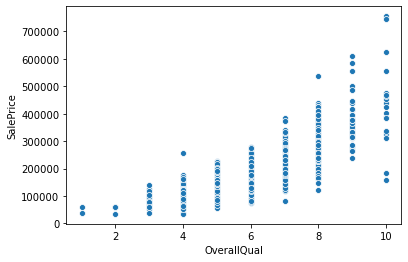

In [17]:
# cheking outlayers for the most correlated feature
sns.scatterplot(x='OverallQual',y='SalePrice',data=df_train)

In [232]:
#Dropping Rows for outlayers of the most correlated feature
df_train = df_train.drop(df_train[(df_train["OverallQual"]> 8) &(df_train["SalePrice"]<250000)].index, axis=0)

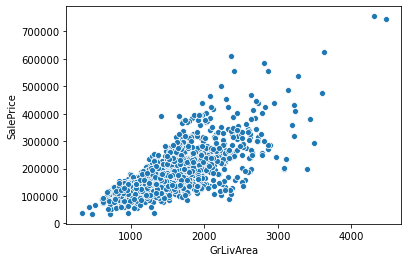

In [19]:
#Cheking the second most correlated feature with target to predict
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

In [233]:
#Dropping Rows for outlayers of the second correlated feature
df_train = df_train.drop(df_train[(df_train["GrLivArea"]> 3000) &(df_train["SalePrice"]<250000)].index, axis=0)

In [234]:
#defining a function to show the features in the dataframe that has more than 0% of null values
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [235]:
percent_nan = percent_missing(df_train)

### Plotting the features with Null values and his %

(0.0, 2.0)

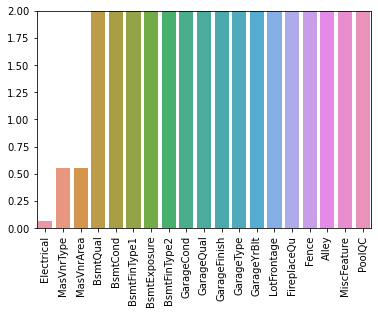

In [25]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,2)



### Dropping the null values rows of the Electrical feature, because the number of rows its less than 0,2 % of null values

In [236]:
df_train = df_train.drop(df_train[df_train["Electrical"].isnull()].index, axis=0)

In [27]:
# Exploring the null values of the feature, because all the Null values could be as dont have, looking in the description of each feature, there is a None
df_train[df_train["MasVnrType"].isnull()] 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [237]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")

In [238]:
# As we dont have MasVrnType, the area must be cero
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

(0.0, 20.0)

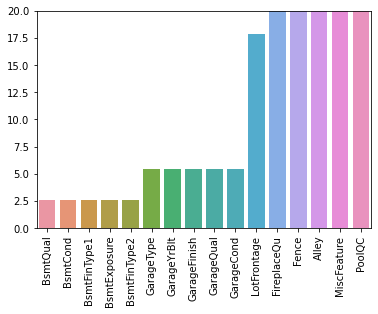

In [31]:
#Reviewing new features with non null values
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,20)

In [239]:
bsmt_num_cols = percent_nan[percent_nan<3].index
print(bsmt_num_cols)

Index(['Electrical', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'],
      dtype='object')


In [240]:
df_train["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [241]:
#All values nan for the features with less than 3% of missing values will be replaced for None, as an assumption that if its nan its because it dont have that feature
df_train[bsmt_num_cols] = df_train[bsmt_num_cols].fillna("None")

In [242]:
bsmt_num2_cols = percent_nan[percent_nan<6].index
print(bsmt_num2_cols)

Index(['Electrical', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'GarageYrBlt'],
      dtype='object')


In [38]:
df_train[bsmt_num2_cols]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtExposure,BsmtFinType2,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
Id,,,,,,,,,,
1,Gd,TA,GLQ,No,Unf,Attchd,2003.0,RFn,TA,TA
2,Gd,TA,ALQ,Gd,Unf,Attchd,1976.0,RFn,TA,TA
3,Gd,TA,GLQ,Mn,Unf,Attchd,2001.0,RFn,TA,TA
4,TA,Gd,ALQ,No,Unf,Detchd,1998.0,Unf,TA,TA
5,Gd,TA,GLQ,Av,Unf,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...
1456,Gd,TA,Unf,No,Unf,Attchd,1999.0,RFn,TA,TA
1457,Gd,TA,ALQ,No,Rec,Attchd,1978.0,Unf,TA,TA
1458,TA,Gd,GLQ,No,Unf,Attchd,1941.0,RFn,TA,TA


In [243]:
#Filling na values form year with the average , cause less noise that fill this values with 0, because are years of construction
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].mean())

In [244]:
percent_nan = percent_missing(df_train)
bsmt_num3_cols = percent_nan[percent_nan<6].index
print(bsmt_num3_cols)

Index(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')


In [245]:
print(df_train[bsmt_num3_cols].head())
df_train["GarageCond"].unique()

   GarageType GarageFinish GarageQual GarageCond
Id                                              
1      Attchd          RFn         TA         TA
2      Attchd          RFn         TA         TA
3      Attchd          RFn         TA         TA
4      Detchd          Unf         TA         TA
5      Attchd          RFn         TA         TA


array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [247]:
df_train[bsmt_num3_cols] = df_train[bsmt_num3_cols].fillna("None") 
# Its been replaced the null values of the features with None, as all the remaining features are categorical

(0.0, 20.0)

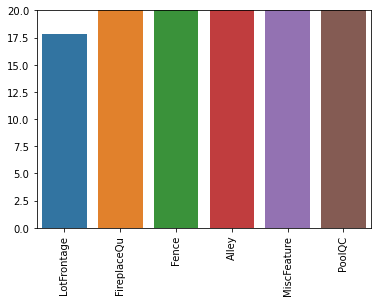

In [248]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,20)

In [249]:
bsmt_num4_cols = percent_nan[percent_nan<6].index
print(bsmt_num4_cols)

Index([], dtype='object')


In [160]:
#Reviewing remaining features with null values

(0.0, 80.0)

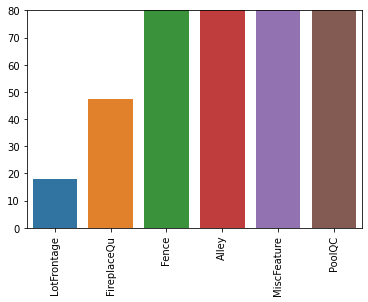

In [250]:
percent_nan = percent_missing(df_train)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,80)

In [251]:
bsmt_num5_cols = percent_nan[percent_nan<100].index
print(bsmt_num5_cols)

Index(['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'],
      dtype='object')


In [252]:
#As the null values for this features are more than 50% of the data and are not correlated features with the target, it will be dropped
Drop_Features = [] #Very important variable to store, then we need to drop this features form the test set
Drop_Features.append(df_train[bsmt_num5_cols].columns)
print(Drop_Features)
df_train = df_train.dropna(axis=1)

[Index(['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'],
      dtype='object')]


In [253]:
#Reviewing non null values on dataset
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [254]:
#We need to convert categorical values in to numerical
df_train.select_dtypes(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [255]:
#Lets create as a function, because we will use this for convert test features to categorical
def convert_categorical(df):
    df_nums = df.select_dtypes(exclude='object')
    df_objs = df.select_dtypes(include='object')
    df_objs = pd.get_dummies(df_objs,drop_first=True)
    final_df = pd.concat([df_nums,df_objs],axis=1)
    return final_df

In [256]:
final_df = convert_categorical(df_train)

In [257]:
final_df.corr()["SalePrice"].sort_values()

ExterQual_TA       -0.590215
KitchenQual_TA     -0.520056
BsmtQual_TA        -0.454705
GarageFinish_Unf   -0.411640
MasVnrType_None    -0.369774
                      ...   
GarageCars          0.644355
TotalBsmtSF         0.651763
GrLivArea           0.743059
OverallQual         0.796565
SalePrice           1.000000
Name: SalePrice, Length: 240, dtype: float64

## Ready to create our variables for the model

In [258]:
X = final_df.drop("SalePrice", axis=1)

In [259]:
y = final_df["SalePrice"]

In [109]:
model_scoring = {}

In [123]:

print(model_scoring)

{LinearRegression(): 3.5154181661359667, ElasticNet(): 0.12898039282911225, ElasticNet(alpha=1, max_iter=5000): 0.12898039282911225, ElasticNet(max_iter=5000): 0.24022285488904327}


## Lets separate our dataset to validate after training, and tune hyperparameters before send final submission

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [261]:
Scaler = StandardScaler()
X_scaled_train = Scaler.fit_transform(X_train)
X_scaled_test = Scaler.transform(X_test)

### Models Training and Evaluation

### Linear Regression Model

In [264]:
model_lineal = LinearRegression(fit_intercept=True)

def rmse_log(model_lineal):
    operations = [("Scaler", Scaler),("model_lineal", model_lineal)]
    pipe = Pipeline(operations)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(np.log(abs(y_pred)), np.log(abs(y_test)))
    lrmse = math.sqrt(mse)
    model_scoring[model_lineal]=lrmse
    return lrmse
lrmse = rmse_log(model_lineal)
print(lrmse)

3.5154181661359667


### ElasticNEt Model

In [115]:
model_elastic = ElasticNet()
lrmse = rmse_log(model_elastic)
print(lrmse)


0.12898039282911225


### ElasticNet with parameters Search

In [102]:
grid_values = {"alpha":[0.0001, 0.001, 0.01, 0.1, 0.5, 0.9, 1, 50, 100], "l1_ratio":[0.001, 0.01, 0.1, 0.5, 0.9, 1]}
model2_elastic = ElasticNet(max_iter=5000)
gridsearch = GridSearchCV(model2_elastic, param_grid =grid_values, scoring="neg_mean_squared_log_error")
gridsearch.fit(X_scaled_train, y_train)
gridsearch.best_params_

/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139798950515.8772, tolerance: 515833663.6276671
  model = cd_fast.enet_coordinate_descent(
/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152419273162.57758, tolerance: 540502939.6848438
  model = cd_fast.enet_coordinate_descent(
/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144594640118.5745, tolerance: 539569911.4949595
  model = cd_fast.enet_coordinate_descent(
/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143783632255.28665, tolerance: 539569911.4949595
  model = cd_fast.enet_coordinate_descent(
/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14202394089.831696, tolerance: 524516537.7040853
  model = cd_fast.enet_coordinate_descent(
/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13309591799.88733, tolerance: 524150333.16945404
  model = cd_fast.enet_coordinate_descent(
/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/skl

/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140119280167.87875, tolerance: 524150333.16945404
  model = cd_fast.enet_coordinate_descent(
/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15958814377.461609, tolerance: 515833663.6276671
  model = cd_fast.enet_coordinate_descent(
/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14604951482.028992, tolerance: 540502939.6848438
  model = cd_fast.enet_coordinate_descent(
/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sk

{'alpha': 1, 'l1_ratio': 0.5}

Best params {'alpha': 1, 'l1_ratio': 0.5}

In [118]:
model2_elastic = ElasticNet(max_iter=5000, alpha=1, l1_ratio=0.5)
lrmse = rmse_log(model2_elastic)
print(lrmse)

0.12898039282911225


### Polynomic linear model degree 2

In [121]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features_train = polynomial_converter.fit_transform(X_scaled_train)
poly_features_test = polynomial_converter.transform(X_scaled_test)
model_poly_2 = ElasticNet(max_iter=5000)
model_poly_2.fit(poly_features_train, y_train)
y_pred = model_poly_2.predict(poly_features_test)
mse = mean_squared_log_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)
model_scoring[model_poly_2]=rmse

0.24022285488904327


/Users/PsyGravy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41891850787.40258, tolerance: 661261269.5020413
  model = cd_fast.enet_coordinate_descent(


### Ridge Regression

In [126]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100),scoring='neg_mean_squared_error')
lrmse = rmse_log(ridge_cv_model)
print(lrmse)

0.13592241313972056


In [127]:
print(ridge_cv_model.alpha_)


50.0


### Lasso Regression

In [ ]:
alphas = np.linspace(0.0001, 0.005, 200)
lasso_cv_model = LassoCV(eps=0.1,cv=5, alphas=alphas)
lrmse = rmse_log(lasso_cv_model)
print(lrmse)

## Can improve if we select more correlated featues only?

In [130]:
df_train.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.137366
EnclosedPorch   -0.136028
MSSubClass      -0.084893
OverallCond     -0.077328
LowQualFinSF    -0.038487
YrSold          -0.028646
MiscVal         -0.021095
BsmtHalfBath    -0.018627
BsmtFinSF2      -0.012102
3SsnPorch        0.044742
MoSold           0.047322
PoolArea         0.099629
ScreenPorch      0.111837
BedroomAbvGr     0.169692
BsmtUnfSF        0.214134
BsmtFullBath     0.228873
LotArea          0.267578
HalfBath         0.286192
2ndFlrSF         0.321078
OpenPorchSF      0.321096
WoodDeckSF       0.324920
BsmtFinSF1       0.410103
Fireplaces       0.471209
GarageYrBlt      0.473394
MasVnrArea       0.479086
YearRemodAdd     0.507914
YearBuilt        0.527236
TotRmsAbvGrd     0.544224
FullBath         0.562964
1stFlrSF         0.631890
GarageArea       0.631921
GarageCars       0.644355
TotalBsmtSF      0.651763
GrLivArea        0.743059
OverallQual      0.796565
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [131]:
features_selected = ['OverallQual', 'GrLivArea', 'GarageCars',  'TotalBsmtSF', "YearBuilt"]
X_train_featureselected = X_train[features_selected]
X_test_featureselected = X_test[features_selected]
Scaler_2 = StandardScaler()
X_train_featurescaled = Scaler_2.fit_transform(X_train_featureselected)
X_test_featurescaled = Scaler_2.transform(X_test_featureselected)

In [133]:
model_elastic_features_more_corr = ElasticNet()
model_elastic_features_more_corr.fit(X_train_featurescaled, y_train)
y_pred = model_elastic_features_more_corr.predict(X_test_featurescaled)
mse = mean_squared_log_error(abs(y_test), abs(y_pred))
rmse = math.sqrt(mse)
print(rmse)
model_scoring[model_elastic_features_more_corr]=rmse

0.18617803231281185


### Polynomial regressor with degree 3 on selected features

In [387]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features_train = polynomial_converter.fit_transform(X_train_featurescaled)
poly_features_test = polynomial_converter.transform(X_test_featurescaled)
model = ElasticNet(max_iter=10000)
model.fit(poly_features_train, y_train)
y_pred = model.predict(poly_features_test)
mse = mean_squared_log_error(abs(y_test), abs(y_pred))
rmse = np.sqrt(mse)
print(rmse)

0.17543266422587214


### Random forest on all clean Data

In [136]:
RandomForestC = RandomForestClassifier(max_depth=20, random_state=0, criterion="entropy")

lrmse = rmse_log(RandomForestC)
print(lrmse)

0.20390793780137245


### Lets use Random forest to select best features in all clean data

In [138]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, max_features="auto"))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

68
Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'MSZoning_RL',
       'LotShape_Reg', 'LotConfig_Inside', 'Neighborhood_CollgCr',
       'Condition1_Norm', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_

In [140]:
X_train.shape

(1089, 239)

we reduce from 239 rows to 68 rows with random forest selector

In [144]:
X_feature_selected_scaled_train = X_train[selected_feat]
Scaler_data = StandardScaler()
X_feature_selected_scaled_train = Scaler_data.fit_transform(X_feature_selected_scaled_train)
X_feature_selected_scaled_test = X_test[selected_feat]
X_feature_selected_scaled_test = Scaler_data.transform(X_feature_selected_scaled_test)

We try with the best model till the moment this new selected features to see if improves

In [145]:
model_elastic_with_random_features = ElasticNet()
model_elastic_with_random_features.fit(X_feature_selected_scaled_train, y_train)

y_pred = model_elastic_with_random_features.predict(X_feature_selected_scaled_test)
mse = mean_squared_log_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)
model_scoring[model_elastic_features_more_corr]=rmse

0.13908735264111993


In [147]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)
elastic_model.fit(X_feature_selected_scaled_train,y_train)
print(elastic_model.l1_ratio_)
test_predictions = elastic_model.predict(X_feature_selected_scaled_test)
mse = mean_squared_log_error(abs(test_predictions), abs(y_test))
rmse = np.sqrt(mse)
print(rmse)
print(np.sqrt(mean_squared_error(abs(test_predictions), abs(y_test))))

1.0
0.14943981830017028
27893.583095832204


No Improvements

### Lets try with XgBoost Regressor

In [217]:
xgboost = XGBRegressor(learning_rate=0.008,
                       n_estimators=6000,
                       max_depth=8,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

lrmse = rmse_log(xgboost)
print(lrmse)


0.12038266525714753


In [262]:
xgboost2 = XGBRegressor(learning_rate=0.008,
                       n_estimators=6000,
                       max_depth=8,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)
grid_values = {"learning_rate":[0.0001, 0.001, 0.01, 0.1, 1],"gamma":[0.001, 0.01, 0.1, 0.5, 1], "max_depth":[6, 8, 10, 12], "reg_alpha":[0.00006, 0.5]}
gridsearch = GridSearchCV(xgboost2, param_grid =grid_values,verbose=2, n_jobs=1, cv=2 )
gridsearch.fit(X_scaled_train, y_train)
gridsearch.best_params_

Fitting 2 folds for each of 200 candidates, totalling 400 fits
[CV] gamma=0.001, learning_rate=0.0001, max_depth=6, reg_alpha=6e-05 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.001, learning_rate=0.0001, max_depth=6, reg_alpha=6e-05, total=  35.8s
[CV] gamma=0.001, learning_rate=0.0001, max_depth=6, reg_alpha=6e-05 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.8s remaining:    0.0s


[CV]  gamma=0.001, learning_rate=0.0001, max_depth=6, reg_alpha=6e-05, total=  35.0s
[CV] gamma=0.001, learning_rate=0.0001, max_depth=6, reg_alpha=0.5 ...
[CV]  gamma=0.001, learning_rate=0.0001, max_depth=6, reg_alpha=0.5, total=  37.5s
[CV] gamma=0.001, learning_rate=0.0001, max_depth=6, reg_alpha=0.5 ...
[CV]  gamma=0.001, learning_rate=0.0001, max_depth=6, reg_alpha=0.5, total=  38.5s
[CV] gamma=0.001, learning_rate=0.0001, max_depth=8, reg_alpha=6e-05 .
[CV]  gamma=0.001, learning_rate=0.0001, max_depth=8, reg_alpha=6e-05, total=  38.5s
[CV] gamma=0.001, learning_rate=0.0001, max_depth=8, reg_alpha=6e-05 .
[CV]  gamma=0.001, learning_rate=0.0001, max_depth=8, reg_alpha=6e-05, total=  37.1s
[CV] gamma=0.001, learning_rate=0.0001, max_depth=8, reg_alpha=0.5 ...
[CV]  gamma=0.001, learning_rate=0.0001, max_depth=8, reg_alpha=0.5, total=  40.0s
[CV] gamma=0.001, learning_rate=0.0001, max_depth=8, reg_alpha=0.5 ...
[CV]  gamma=0.001, learning_rate=0.0001, max_depth=8, reg_alpha=0.5, t

[CV]  gamma=0.001, learning_rate=0.1, max_depth=8, reg_alpha=0.5, total=  55.0s
[CV] gamma=0.001, learning_rate=0.1, max_depth=10, reg_alpha=6e-05 ...
[CV]  gamma=0.001, learning_rate=0.1, max_depth=10, reg_alpha=6e-05, total= 1.1min
[CV] gamma=0.001, learning_rate=0.1, max_depth=10, reg_alpha=6e-05 ...
[CV]  gamma=0.001, learning_rate=0.1, max_depth=10, reg_alpha=6e-05, total= 1.1min
[CV] gamma=0.001, learning_rate=0.1, max_depth=10, reg_alpha=0.5 .....
[CV]  gamma=0.001, learning_rate=0.1, max_depth=10, reg_alpha=0.5, total= 1.0min
[CV] gamma=0.001, learning_rate=0.1, max_depth=10, reg_alpha=0.5 .....
[CV]  gamma=0.001, learning_rate=0.1, max_depth=10, reg_alpha=0.5, total= 1.0min
[CV] gamma=0.001, learning_rate=0.1, max_depth=12, reg_alpha=6e-05 ...
[CV]  gamma=0.001, learning_rate=0.1, max_depth=12, reg_alpha=6e-05, total= 1.3min
[CV] gamma=0.001, learning_rate=0.1, max_depth=12, reg_alpha=6e-05 ...
[CV]  gamma=0.001, learning_rate=0.1, max_depth=12, reg_alpha=6e-05, total= 1.4min


[CV]  gamma=0.01, learning_rate=0.001, max_depth=12, reg_alpha=6e-05, total= 1.4min
[CV] gamma=0.01, learning_rate=0.001, max_depth=12, reg_alpha=0.5 ....
[CV]  gamma=0.01, learning_rate=0.001, max_depth=12, reg_alpha=0.5, total= 1.3min
[CV] gamma=0.01, learning_rate=0.001, max_depth=12, reg_alpha=0.5 ....
[CV]  gamma=0.01, learning_rate=0.001, max_depth=12, reg_alpha=0.5, total= 1.3min
[CV] gamma=0.01, learning_rate=0.01, max_depth=6, reg_alpha=6e-05 ....
[CV]  gamma=0.01, learning_rate=0.01, max_depth=6, reg_alpha=6e-05, total=  46.1s
[CV] gamma=0.01, learning_rate=0.01, max_depth=6, reg_alpha=6e-05 ....
[CV]  gamma=0.01, learning_rate=0.01, max_depth=6, reg_alpha=6e-05, total=  48.8s
[CV] gamma=0.01, learning_rate=0.01, max_depth=6, reg_alpha=0.5 ......
[CV]  gamma=0.01, learning_rate=0.01, max_depth=6, reg_alpha=0.5, total=  46.5s
[CV] gamma=0.01, learning_rate=0.01, max_depth=6, reg_alpha=0.5 ......
[CV]  gamma=0.01, learning_rate=0.01, max_depth=6, reg_alpha=0.5, total=  47.3s
[C

[CV]  gamma=0.1, learning_rate=0.0001, max_depth=8, reg_alpha=6e-05, total= 1.1min
[CV] gamma=0.1, learning_rate=0.0001, max_depth=8, reg_alpha=6e-05 ...
[CV]  gamma=0.1, learning_rate=0.0001, max_depth=8, reg_alpha=6e-05, total= 1.0min
[CV] gamma=0.1, learning_rate=0.0001, max_depth=8, reg_alpha=0.5 .....
[CV]  gamma=0.1, learning_rate=0.0001, max_depth=8, reg_alpha=0.5, total= 1.1min
[CV] gamma=0.1, learning_rate=0.0001, max_depth=8, reg_alpha=0.5 .....
[CV]  gamma=0.1, learning_rate=0.0001, max_depth=8, reg_alpha=0.5, total= 1.1min
[CV] gamma=0.1, learning_rate=0.0001, max_depth=10, reg_alpha=6e-05 ..
[CV]  gamma=0.1, learning_rate=0.0001, max_depth=10, reg_alpha=6e-05, total= 1.2min
[CV] gamma=0.1, learning_rate=0.0001, max_depth=10, reg_alpha=6e-05 ..
[CV]  gamma=0.1, learning_rate=0.0001, max_depth=10, reg_alpha=6e-05, total=  47.4s
[CV] gamma=0.1, learning_rate=0.0001, max_depth=10, reg_alpha=0.5 ....
[CV]  gamma=0.1, learning_rate=0.0001, max_depth=10, reg_alpha=0.5, total=  39

[CV]  gamma=0.1, learning_rate=0.1, max_depth=10, reg_alpha=0.5, total= 1.2min
[CV] gamma=0.1, learning_rate=0.1, max_depth=10, reg_alpha=0.5 .......
[CV]  gamma=0.1, learning_rate=0.1, max_depth=10, reg_alpha=0.5, total= 1.3min
[CV] gamma=0.1, learning_rate=0.1, max_depth=12, reg_alpha=6e-05 .....
[CV]  gamma=0.1, learning_rate=0.1, max_depth=12, reg_alpha=6e-05, total= 1.6min
[CV] gamma=0.1, learning_rate=0.1, max_depth=12, reg_alpha=6e-05 .....
[CV]  gamma=0.1, learning_rate=0.1, max_depth=12, reg_alpha=6e-05, total= 1.6min
[CV] gamma=0.1, learning_rate=0.1, max_depth=12, reg_alpha=0.5 .......
[CV]  gamma=0.1, learning_rate=0.1, max_depth=12, reg_alpha=0.5, total= 1.6min
[CV] gamma=0.1, learning_rate=0.1, max_depth=12, reg_alpha=0.5 .......
[CV]  gamma=0.1, learning_rate=0.1, max_depth=12, reg_alpha=0.5, total= 1.5min
[CV] gamma=0.1, learning_rate=1, max_depth=6, reg_alpha=6e-05 ........
[CV]  gamma=0.1, learning_rate=1, max_depth=6, reg_alpha=6e-05, total=  46.8s
[CV] gamma=0.1, le

[CV]  gamma=0.5, learning_rate=0.01, max_depth=6, reg_alpha=6e-05, total=  41.5s
[CV] gamma=0.5, learning_rate=0.01, max_depth=6, reg_alpha=0.5 .......
[CV]  gamma=0.5, learning_rate=0.01, max_depth=6, reg_alpha=0.5, total=  40.9s
[CV] gamma=0.5, learning_rate=0.01, max_depth=6, reg_alpha=0.5 .......
[CV]  gamma=0.5, learning_rate=0.01, max_depth=6, reg_alpha=0.5, total=  40.5s
[CV] gamma=0.5, learning_rate=0.01, max_depth=8, reg_alpha=6e-05 .....
[CV]  gamma=0.5, learning_rate=0.01, max_depth=8, reg_alpha=6e-05, total=  54.4s
[CV] gamma=0.5, learning_rate=0.01, max_depth=8, reg_alpha=6e-05 .....
[CV]  gamma=0.5, learning_rate=0.01, max_depth=8, reg_alpha=6e-05, total=  55.5s
[CV] gamma=0.5, learning_rate=0.01, max_depth=8, reg_alpha=0.5 .......
[CV]  gamma=0.5, learning_rate=0.01, max_depth=8, reg_alpha=0.5, total=  55.8s
[CV] gamma=0.5, learning_rate=0.01, max_depth=8, reg_alpha=0.5 .......
[CV]  gamma=0.5, learning_rate=0.01, max_depth=8, reg_alpha=0.5, total=  56.0s
[CV] gamma=0.5,

[CV]  gamma=1, learning_rate=0.0001, max_depth=10, reg_alpha=6e-05, total=  43.3s
[CV] gamma=1, learning_rate=0.0001, max_depth=10, reg_alpha=6e-05 ....
[CV]  gamma=1, learning_rate=0.0001, max_depth=10, reg_alpha=6e-05, total=  40.3s
[CV] gamma=1, learning_rate=0.0001, max_depth=10, reg_alpha=0.5 ......
[CV]  gamma=1, learning_rate=0.0001, max_depth=10, reg_alpha=0.5, total=  43.7s
[CV] gamma=1, learning_rate=0.0001, max_depth=10, reg_alpha=0.5 ......
[CV]  gamma=1, learning_rate=0.0001, max_depth=10, reg_alpha=0.5, total=  40.2s
[CV] gamma=1, learning_rate=0.0001, max_depth=12, reg_alpha=6e-05 ....
[CV]  gamma=1, learning_rate=0.0001, max_depth=12, reg_alpha=6e-05, total=  43.8s
[CV] gamma=1, learning_rate=0.0001, max_depth=12, reg_alpha=6e-05 ....
[CV]  gamma=1, learning_rate=0.0001, max_depth=12, reg_alpha=6e-05, total=  42.9s
[CV] gamma=1, learning_rate=0.0001, max_depth=12, reg_alpha=0.5 ......
[CV]  gamma=1, learning_rate=0.0001, max_depth=12, reg_alpha=0.5, total=  46.7s
[CV] g

[CV]  gamma=1, learning_rate=0.1, max_depth=12, reg_alpha=0.5, total= 1.7min
[CV] gamma=1, learning_rate=1, max_depth=6, reg_alpha=6e-05 ..........
[CV]  gamma=1, learning_rate=1, max_depth=6, reg_alpha=6e-05, total=  54.4s
[CV] gamma=1, learning_rate=1, max_depth=6, reg_alpha=6e-05 ..........
[CV]  gamma=1, learning_rate=1, max_depth=6, reg_alpha=6e-05, total=  53.8s
[CV] gamma=1, learning_rate=1, max_depth=6, reg_alpha=0.5 ............
[CV]  gamma=1, learning_rate=1, max_depth=6, reg_alpha=0.5, total=  54.2s
[CV] gamma=1, learning_rate=1, max_depth=6, reg_alpha=0.5 ............
[CV]  gamma=1, learning_rate=1, max_depth=6, reg_alpha=0.5, total= 1.1min
[CV] gamma=1, learning_rate=1, max_depth=8, reg_alpha=6e-05 ..........
[CV]  gamma=1, learning_rate=1, max_depth=8, reg_alpha=6e-05, total= 1.3min
[CV] gamma=1, learning_rate=1, max_depth=8, reg_alpha=6e-05 ..........
[CV]  gamma=1, learning_rate=1, max_depth=8, reg_alpha=6e-05, total= 1.3min
[CV] gamma=1, learning_rate=1, max_depth=8, r

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 447.8min finished


{'gamma': 1, 'learning_rate': 0.01, 'max_depth': 6, 'reg_alpha': 6e-05}

In [265]:
xgboost3 = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=6,
                       min_child_weight=0,
                       gamma=1,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

lrmse = rmse_log(xgboost3)
print(lrmse)

0.11827629231250401


In [266]:
df_scoring = pd.DataFrame(list(model_scoring.items()),columns = ['Model','Metri Eval']) 
print("The {} is selected to train with complete Dataset".format(df_scoring.sort_values(by=['Metri Eval']).iloc[0]))

The Model         XGBRegressor(base_score=0.5, booster='gbtree',...
Metri Eval                                             0.118276
Name: 12, dtype: object is selected to train with complete Dataset


## Make Submission file with test data, we need to apply the exact preprocessing that we do to train data

In [267]:
df_test_sub = df_test.copy()

In [268]:
for x in Drop_Features:
    df_test_sub = df_test_sub.drop(x, axis=1)

### Lets use the function to convert categorical and we are done

In [269]:

final_df_test = convert_categorical(df_test_sub)

# Train XGBoost Regressor with complete dataset (Only in the features that we have in test set)

In [270]:
xgboost3 = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=6,
                       min_child_weight=0,
                       gamma=1,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

operations = [("Scaler", Scaler),("xgboost3", xgboost3)]
pipe = Pipeline(operations)
pipe.fit(X[final_df_test.columns], y)
y_pred = pipe.predict(X[final_df_test.columns])
mse = mean_squared_error(np.log(abs(y_pred)), np.log(abs(y)))
lrmse = math.sqrt(mse)


In [271]:
print("Evaluation Metric for Training Set is {}".format(lrmse))

Evaluation Metric for Training Set is 0.001707797265887889


### Create Submission Files with predictions

In [272]:
y_pred_test = pipe.predict(final_df_test)
submission = pd.DataFrame({'Id': final_df_test.index, 'SalePrice': y_pred_test})
submission.to_csv('JN_XGBoost_Reg2.csv', index=False)

In [273]:
submission

,Id,SalePrice
0,1461,129267.312500
1,1462,158556.093750
2,1463,186642.640625
3,1464,192801.437500
4,1465,185744.468750
...,...,...
1454,2915,80001.851562
1455,2916,80875.359375
1456,2917,160759.093750
1457,2918,113204.671875
